# Profitable App Profiles for the App Store and Google Play Markets


This project's aim is to find mobile app profiles that are profitable for the App Store and Google Play markets. We only analyze apps that are free to download and install, so their main source of revenue consists of in-app ads. This means revenue for any given app is mostly influenced by the number of users who use our app — the more users that see and engage with the ads, the better.

## Opening and Exploring the Data

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our goals:

* A [data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. 
* A [data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. 

Let's start by opening the two data sets and then continue with exploring the data.

In [35]:
from csv import reader

In [36]:
### The App Store data set ###
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

In [37]:
### The Google Play data set ###
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
Google_Play = list(read_file)
Google_Play_header = Google_Play[0]
Google_Play = Google_Play[1:]

To make it easier to explore the two data sets, we'll first write a function named `explore_data()` that we can use repeatedly to explore rows in a more readable way. We'll also add an option for our function to show the number of rows and columns for any data set.

In [38]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


At a quick glance, the columns that might be useful for the purpose of our analysis are *'track_name'*, *'price'*, *'rating_count_tot'*, *'user_rating'*, and *'prime_genre'*.

In [39]:
print(Google_Play_header)
print('\n')
explore_data(Google_Play, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


The columns that might be useful for the purpose of our analysis are *'App'*, *'Category'*, *'Rating'*, *'Reviews'*, *'Installs'*, *'Type'*, *'Price'*, and *'Genres'*.

## Deleting Wrong Data

The Google Play data set has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.



In [40]:
print(Google_Play[10472])  # incorrect row
print('\n')
print(Google_Play_header)  # header
print('\n')
print(Google_Play[0])      # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


We can see that this row misses the **'Category' value**. As a consequence, we'll delete this row. We put *if clause* so we can run this code more than once without deleting other rows. 

In [41]:
if Google_Play[10472][0]=='Life Made WI-Fi Touchscreen Photo Frame':
    del Google_Play[10472]  
print('New number of rows:',len(Google_Play))
print('Number of columns:', len(Google_Play[0]))

New number of rows: 10840
Number of columns: 13


The Apple Store data set also has a [dedicated discussion](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/discussion) section, but there are no reports of wrong data. 

## Removing Duplicate Entries

Let's write some code and confirm the data has duplicate entries.

In [42]:
duplicate_apps = []
unique_apps = []

for app in Google_Play:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps in the Google Play data set:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps in the Google Play data set:', duplicate_apps[:15])

Number of duplicate apps in the Google Play data set: 1181


Examples of duplicate apps in the Google Play data set: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


In [43]:
duplicate_apps = []
unique_apps = []

for app in ios:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps in the Apple Store data set:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps in the Apple Store data set:', duplicate_apps[:15])

Number of duplicate apps in the Apple Store data set: 0


Examples of duplicate apps in the Apple Store data set: []


For the Google Play data set, we have 1,181 cases where an app occurs more than once. We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. To come up with a method of removing the duplicate rows, let's print the duplicate entries for a popular app and see which version is the most up-to-date.

In [44]:
for app in Google_Play:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


If you examine the rows we printed for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show the data was collected at different times.

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

To remove the duplicates, we will:

* Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.
* Use the information stored in the dictionary and create a new data set, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

In [45]:
reviews_max={}
for row in Google_Play:
    name=row[0]
    n_reviews=float(row[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name]= n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

Let's inspect the dictionary to make sure everything went as expected. Previously, we found that there are 1,181 cases where an app occurs more than once, so the length of our dictionary (of unique apps) should be equal to the difference between the length of our data set and 1,181.

In [46]:
print('Expected length:', len(Google_Play) - 1181)
print('The length of the dictionary:', len(reviews_max))
print('Actual length:', len(Google_Play))

Expected length: 9659
The length of the dictionary: 9659
Actual length: 10840


Let's use the dictionary `reviews_max` we created above to remove the duplicate rows.
In the code cell below:

* We start by initializing two empty lists, `Google_Play_clean` and `already_added`.
* We loop through the Google Play data set, and for every iteration:
    * We isolate the name of the app and the number of reviews.
    * We add the current row (`row`) to the `Google_Play_clean`, and the app name (`name`) to the `already_added` list if:
        + The number of reviews of the current app matches the number of reviews of that app as described in the `reviews_max` dictionary; 
        + And the name of the app is not already in the `already_added` list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for `reviews_max[name] == n_reviews`, we'll still end up with duplicate entries for some apps.

In [47]:
Google_Play_clean=[]
already_added=[]
for row in Google_Play:
    name=row[0]
    n_reviews=float(row[3])
    if (n_reviews == reviews_max[name]) and (name not in already_added):
        Google_Play_clean.append(row)
        already_added.append(name) #his helps us to keep track of apps that we already added
explore_data(Google_Play_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


In [48]:
print('Expected length:', len(Google_Play) - 1181)
print('Actual length:', len(Google_Play_clean))

Expected length: 9659
Actual length: 9659


We have 9659 rows, just as expected.

## Removing Non-English Apps

For this particular analysis, we are interested only in English-speaking audience. However, if we explore the data long enough, we'll find that both data sets have apps with names that suggest they are not directed toward an English-speaking audience. Below, we see a couple of examples from both data sets:

In [49]:
print(ios[813][1])
print(ios[6731][1])

print(Google_Play_clean[4412][0])
print(Google_Play_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


We're not interested in keeping these apps, so we'll remove them. One way to go about this is to remove each app with a name containing a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, *, /).

Behind the scenes, each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character `'a'` is 97, character `'A'` is 65, and character `'爱'` is 29,233. We can get the corresponding number of each character using the [`ord()` built-in function]
(https://docs.python.org/3/library/functions.html#ord).

The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) system. Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

In [50]:
def eng_apps(string):
    for each in string:
        if ord(each)>127:
            return False
    return True
print(eng_apps('Instagram'))
print(eng_apps('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


The function seems to work fine, but some English app names use emojis or other symbols (™, etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [51]:
print(eng_apps('Docs To Go™ Free Office Suite'))
print(eng_apps('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. This means all English apps with up to three emoji or other special characters will still be labeled as English. Our filter function is still not perfect, but it should be fairly effective.

In [52]:
def eng_apps(string):
    is_eng=0
    for each in string:
        if ord(each)>127:
            is_eng +=1
    if is_eng > 3:
        return False
    else:
        return True
print(eng_apps('Instachat 😜'))
print(eng_apps('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


In [53]:
Google_Play_english = []
ios_english = []

for app in Google_Play_clean:
    name = app[0]
    if eng_apps(name):
        Google_Play_english.append(app)
        
for app in ios:
    name = app[1]
    if eng_apps(name):
        ios_english.append(app)
        
explore_data(Google_Play_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

In [54]:
ios_free=[]
Google_Play_free=[]
for row in ios_english:
    price=row[4]
    if price == '0.0':
        ios_free.append(row)

for row in Google_Play_english:
    price=row[7]
    if price == '0':
        Google_Play_free.append(row)
        
print(len(Google_Play_free))
print(len(ios_free))

8864
3222


We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

## Most Common Apps by Genre

So far, we spent a good amount of time on cleaning data, and:

* Removed inaccurate data
* Removed duplicate app entries
* Removed non-English apps
* Isolated the free apps

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.
Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market.  For this, we'll build a frequency table for the `prime_genre` column of the App Store data set, and the `Genres` and `Category` columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages
* Another function we can use to display the percentages in a descending order

In [55]:
def freq_table(dataset, index):
    our_table = {}
    total = 0
    for row in dataset:
        total += 1
        our_column = row[index]
        if our_column not in our_table:
            our_table[our_column] = 1
        else:
            our_table[our_column] += 1
            
    table_percentages = {}
    for key in our_table:
        percentage = (our_table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

We start by examining the frequency table for the `prime_genre` column of the App Store data set.

In [56]:
display_table(ios_free, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the `Genres` and `Category` columns of the Google Play data set (two columns which seem to be related).

In [57]:
display_table(Google_Play_free, 1) # Category

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the [family category](https://play.google.com/store/apps/category/FAMILY?hl=en) (which accounts for almost 19% of the apps) means mostly games for kids.


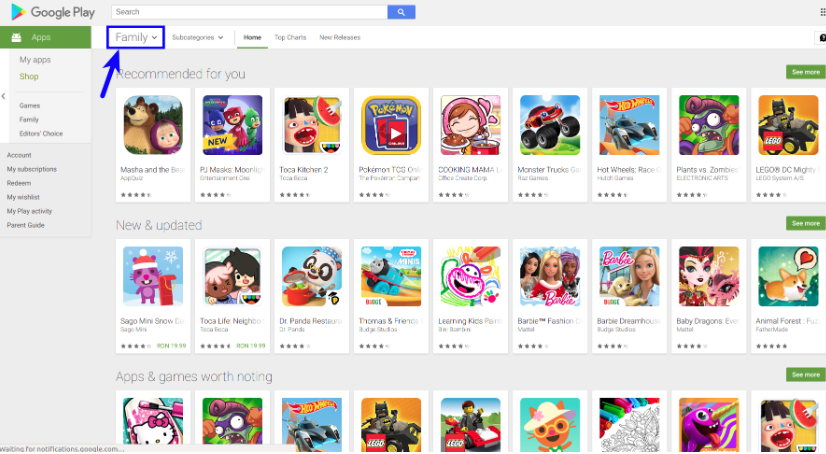

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [58]:
display_table(Google_Play_free, -4) # Genres

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The difference between the `Genres` and the `Category` columns is not crystal clear, but one thing we can notice is that the `Genres` column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the `Category` column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store¶

Let's start with calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to:

* Isolate the apps of each genre.
* Sum up the user ratings for the apps of that genre.
* Divide the sum by the number of apps belonging to that genre (not by the total number of apps).

Below, we calculate the average number of user ratings per app genre on the App Store:

In [59]:
genres_ios = freq_table(ios_free, -5)
for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_free:
        genre_app = app[-5]
        if genre_app == genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:



In [60]:
for app in ios_free:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

In [61]:
for app in ios_free:
    if app[-5] == 'Social Networking':
        print(app[1], ':', app[5]) # print name and number of ratings

Facebook : 2974676
Pinterest : 1061624
Skype for iPhone : 373519
Messenger : 351466
Tumblr : 334293
WhatsApp Messenger : 287589
Kik : 260965
ooVoo – Free Video Call, Text and Voice : 177501
TextNow - Unlimited Text + Calls : 164963
Viber Messenger – Text & Call : 164249
Followers - Social Analytics For Instagram : 112778
MeetMe - Chat and Meet New People : 97072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90414
InsTrack for Instagram - Analytics Plus More : 85535
Tango - Free Video Call, Voice and Chat : 75412
LinkedIn : 71856
Match™ - #1 Dating App. : 60659
Skype for iPad : 60163
POF - Best Dating App for Conversations : 52642
Timehop : 49510
Find My Family, Friends & iPhone - Life360 Locator : 43877
Whisper - Share, Express, Meet : 39819
Hangouts : 36404
LINE PLAY - Your Avatar World : 34677
WeChat : 34584
Badoo - Meet New People, Chat, Socialize. : 34428
Followers + for Instagram - Follower Analytics : 28633
GroupMe : 28260
Marco Polo Video Walkie Talkie : 27662
Miitomo : 2

In [62]:
for app in ios_free:
    if app[-5] == 'Music':
        print(app[1], ':', app[5]) # print name and number of ratings

Pandora - Music & Radio : 1126879
Spotify Music : 878563
Shazam - Discover music, artists, videos & lyrics : 402925
iHeartRadio – Free Music & Radio Stations : 293228
SoundCloud - Music & Audio : 135744
Magic Piano by Smule : 131695
Smule Sing! : 119316
TuneIn Radio - MLB NBA Audiobooks Podcasts Music : 110420
Amazon Music : 106235
SoundHound Song Search & Music Player : 82602
Sonos Controller : 48905
Bandsintown Concerts : 30845
Karaoke - Sing Karaoke, Unlimited Songs! : 28606
My Mixtapez Music : 26286
Sing Karaoke Songs Unlimited with StarMaker : 26227
Ringtones for iPhone & Ringtone Maker : 25403
Musi - Unlimited Music For YouTube : 25193
AutoRap by Smule : 18202
Spinrilla - Mixtapes For Free : 15053
Napster - Top Music & Radio : 14268
edjing Mix:DJ turntable to remix and scratch music : 13580
Free Music - MP3 Streamer & Playlist Manager Pro : 13443
Free Piano app by Yokee : 13016
Google Play Music : 10118
Certified Mixtapes - Hip Hop Albums & Mixtapes : 9975
TIDAL : 7398
YouTube Mu

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [64]:
for app in ios_free:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take a popular universe like Game of Thrones universe
and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, a map of battles, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

## Most Popular Apps by Genre on Google Play

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [67]:
display_table(Google_Play_free, 5) # the Installs columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. To perform computations, however, we'll need to convert each install number from string to float. This means we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error.

In [69]:
Google_Play_genres = freq_table(Google_Play_free, 1)
for genre in Google_Play_genres:
    total= 0 
    len_genre = 0
    for app in Google_Play_free:
        genre_app= app[1]
        if genre_app == genre:
            number_of_installs = app[5]
            number_of_installs = number_of_installs.replace('+', '')
            number_of_installs = number_of_installs.replace(',', '')
            number_of_installs = float(number_of_installs)
            total += number_of_installs
            len_genre += 1
    average = total/len_genre
    print (genre, ':', average)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [71]:
for app in Google_Play_free:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [72]:
under_100_m = []

for app in Google_Play_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [74]:
for app in Google_Play_free:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

## Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.